In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
import dill
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import os
from pathlib import Path
import consts as C
import ipywidgets as widgets

from os import listdir
from os.path import isfile, join
import brian2 as b2
from sorcery import dict_of
import pprint
from cochleas.anf_utils import CheckThreshold
from IPython.display import display
from utils.log import logger
from cochleas.GammatoneCochlea import run_hrtf
from analyze import sound_analysis as SA
from utils.custom_sounds import Tone
import os
import pprint
from os import listdir
from os.path import isfile, join
from pathlib import Path

import brian2 as b2
import brian2hears as b2h
import dill
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from IPython.display import display
from sorcery import dict_of

import consts as C
from analyze import sound_analysis as SA
from cochleas.anf_utils import CheckThreshold
from cochleas.consts import CFMAX, CFMIN
from cochleas.GammatoneCochlea import run_hrtf
from utils.custom_sounds import Tone
from utils.log import logger
from analyze.report import generate_single_result
import pprint
from cochleas.anf_utils import create_sound_key,load_anf_response

from models.InhModel.params import Parameters as InhParam
from models.InhModel.PPGparams import Parameters as PpgParam
from models.InhModel.TCparams import Parameters as TcParam
from utils.custom_sounds import Tone
import brian2hears as b2h
import brian2 as b2

from cochleas.anf_response import AnfResponse
import time



2024-12-09 19:43:43,112 [INFO ]  

>>>>> start execution


In [3]:
input = Tone(500 * b2.Hz, 1500 * b2.ms)
input.sound.level = 70 * b2h.dB
noise_level = 50*b2h.dB
binaural = run_hrtf(input.sound, 45,subj=4)
logger.debug(f"binaural sound post hrtf level={binaural.level}")
noise = b2h.Sound.whitenoise(binaural.duration).atlevel(noise_level)
logger.debug(f"binaural sound post noise level={binaural.level}")
input.sound.play()
time.sleep(1.5)
binaural.play()
time.sleep(1.5)

noise.play()
time.sleep(1.5)
combined = binaural + noise
combined.play()
time.sleep(1.5)

WARNING    <frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.
 [py.warnings]


2024-11-20 13:32:57,272 [DEBUG]  binaural sound post hrtf level=[57.65323047 64.31293556]
2024-11-20 13:32:57,274 [DEBUG]  binaural sound post noise level=[57.65323047 64.31293556]
pygame 2.6.1 (SDL 2.30.7, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


2024-12-09 18:58:03,925 [INFO ]  ignoring cache. generation will take some time...
2024-12-09 18:58:03,929 [INFO ]  generating ANF for {'sound': <utils.custom_sounds.Tone object at 0x7f634bbd8e30>, 'angle': -45, 'cochlea_key': 'gammatone', 'params': {'subj_number': 'headless', 'noise_factor': 0.3, 'refractory_period': 1, 'amplif_factor': 7}}
2024-12-09 18:58:03,930 [DEBUG]  generating spikes for {'sound': <utils.custom_sounds.Tone object at 0x7f634bbd8e30>, 'angle': -45, 'plot_spikes': True, 'subj_number': 'headless', 'noise_factor': 0.3, 'refractory_period': 1. * msecond}
2024-12-09 18:58:03,931 [INFO ]  generating simulated IHC response...


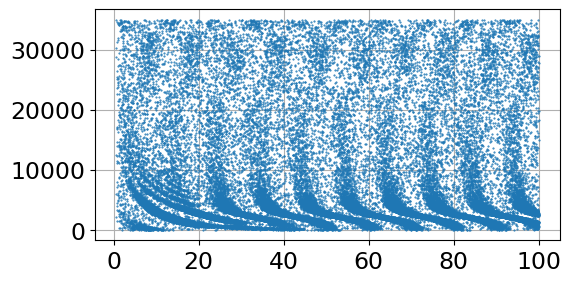

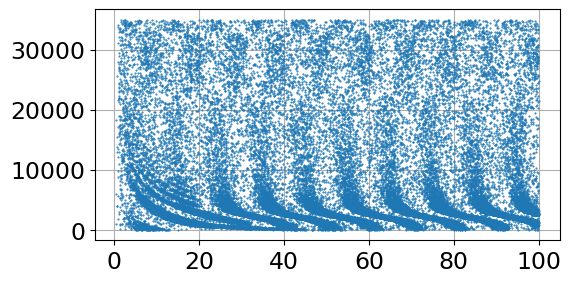

2024-12-09 18:58:11,329 [INFO ]  generation complete.


In [11]:
# sound = b2h.tone(100 * b2.Hz, 0.1 * b2.second)
sound = Tone(100 * b2.Hz, 100 * b2.ms)
sound.sound.level = 50 * b2h.dB
ANGLE = -45
COCH_GAMMATONE = "gammatone"
COCH_TANCARNEY = "TanCarney"
COCH_DCGC = "DCGC"
COCH_PPG = "ppg"
spikes_gamm = load_anf_response(sound, ANGLE, COCH_GAMMATONE, InhParam().cochlea, ignore_cache=True)
# spikes_tc = load_anf_response(sound, ANGLE, COCH_TANCARNEY, TcParam().cochlea)
# spikes_ppg = load_anf_response(sound, ANGLE, COCH_PPG, PpgParam().cochlea)

In [5]:
print(len(spikes_real.binaural_anf_spiketrain['L']))
print(spikes_real.binaural_anf_spiketrain['L'][221])
print(spikes_real.binaural_anf_spiketrain['L'][222])
print(spikes_real.binaural_anf_spiketrain['L'][223])
# results_dir = (
#     Path(os.getcwd()) / Path(C.Paths.RESULTS_DIR) / "correct_time_simulation/withICC&gammatone&13"
# )
# selected = "2024-11-04T00:46:44&tone_100.Hz_90dB&gammatone&withICC&13.pic"
# with open(join(results_dir, selected), "rb") as f:
#     res = dill.load(f, ignore=False)
#     print(res["angle_to_rate"][-45]["DEBUG"]['times'])
#     print(res["angle_to_rate"][-45]["DEBUG2"]['times'])

35000
[  3.5600907    9.54648526  29.22902494  30.77097506  33.62811791
  36.00907029  37.9138322   40.49886621  60.02267574  80.88435374
  89.36507937 108.88888889 111.38321995 121.42857143 131.36054422
 140.79365079 151.72335601] ms
[  8.04988662  22.9478458   30.29478458  32.40362812  35.12471655
  37.89115646  39.79591837  49.47845805  61.33786848  70.90702948
  80.40816327  91.31519274 112.19954649 118.9569161  120.79365079
 130.06802721 140.24943311 150.56689342 160.58956916 162.24489796
 169.90929705 181.67800454 191.45124717 199.93197279] ms
[  4.71655329  28.9569161   31.20181406  33.3106576   38.20861678
  40.36281179  51.49659864  59.88662132  71.97278912  99.09297052
 101.99546485 110.1814059  140.27210884 147.84580499 149.97732426
 160.95238095 171.15646259 179.50113379 190.02267574 192.63038549] ms


2024-11-20 13:33:07,673 [INFO ]  saved ANF not found. generation will take some time...
2024-11-20 13:33:07,674 [INFO ]  generating ANF for {'sound': <utils.custom_sounds.Tone object at 0x7f38d7d4b470>, 'angle': 0, 'cochlea_key': 'gammatone', 'params': {'subj_number': 'headless', 'noise_factor': 0, 'refractory_period': 1, 'amplif_factor': 7}}
2024-11-20 13:33:07,676 [DEBUG]  generating spikes for {'sound': <utils.custom_sounds.Tone object at 0x7f38d7d4b470>, 'angle': 0, 'plot_spikes': False, 'subj_number': 'headless', 'noise_factor': 0, 'refractory_period': 1. * msecond}
2024-11-20 13:33:07,678 [INFO ]  generating simulated IHC response...
2024-11-20 13:33:21,933 [INFO ]  generation complete.
2024-11-20 13:33:25,955 [INFO ]  saved ANF not found. generation will take some time...
2024-11-20 13:33:25,956 [INFO ]  generating ANF for {'sound': <utils.custom_sounds.Tone object at 0x7f38d7d4b470>, 'angle': 0, 'cochlea_key': 'gammatone', 'params': {'subj_number': 'headless', 'noise_factor': 0

KeyboardInterrupt: 

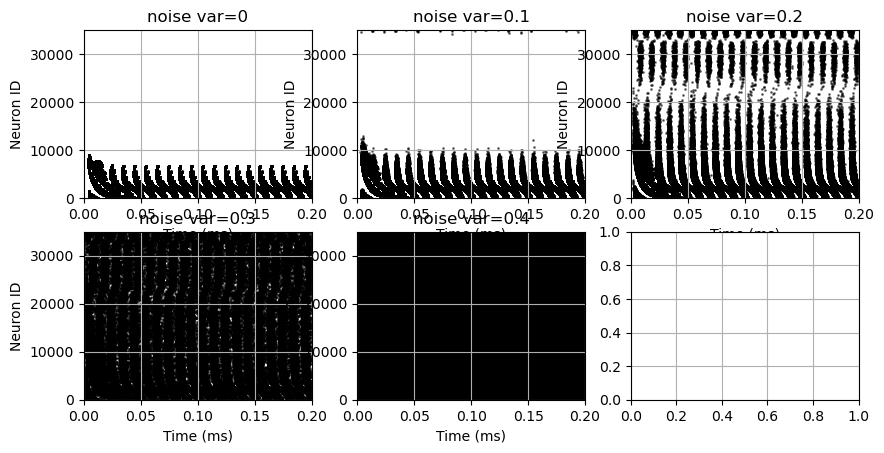

In [6]:
from typing import Iterable
from brian2hears import erbspace


def flatten(items):
    """Yield items from any nested iterable.
    from https://stackoverflow.com/a/40857703
    """
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x


def show_impact_noise(
    cochlea_key,
    sound,
    noise_points=[
        0,
        0.1,
        0.2,
        0.3,
        0.4,
        0.5,
    ],
    params=InhParam(),
    angle=0,
):
    fig, axs = plt.subplots(int(len(noise_points) / 3), 3, figsize=(10, 1.9*len(noise_points)/3+1))
    axs = flatten(axs)
    for ax, noise in zip(axs, noise_points):
        # ax_cf = ax.twinx()
        params.cochlea[cochlea_key]["noise_factor"] = noise
        res = load_anf_response(sound, angle, cochlea_key, params.cochlea)
        spikes = res.binaural_anf_spiketrain["L"]
        # Collect all spike times and corresponding neuron IDs
        all_times = []
        all_neurons = []

        for neuron_id, spike_times in spikes.items():
            times = spike_times / (1 * b2.Hz)
            all_times.extend(times)
            all_neurons.extend([neuron_id] * len(times))
            ax.plot()

        scatter = ax.scatter(all_times, all_neurons, s=1, alpha=0.5, c="black")
        # Plot CFs on the right axis
        # ax_cf.plot(cf_array / b2.Hz, np.arange(len(cf_array)), 'b-', alpha=0.5)
        # ax.set_xscale('log')
        ax.xaxis.set_ticks(np.linspace(0, sound.sound.duration / b2.second, num=5))

        # Customize plots
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Neuron ID")

        # ax_cf.grid(True, which='both', ls='-', alpha=0.2)

        # Align y-axes
        ax.set_ylim(0, 35000)
        ax.set_xlim(0, sound.sound.duration / b2.second)
        ax.set_title(f"noise var={noise}")

    fig.suptitle(f"(Left) ANF spiketimes (Tone {sound.frequency})")
    plt.tight_layout()
    fig.show()


show_impact_noise(COCH_GAMMATONE, Tone(100 * b2.Hz, 200 * b2.ms))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from typing import Dict, List, Tuple
import brian2 as b2
from brian2hears import erbspace


def get_spike_phases(spike_times: np.ndarray, frequency: float) -> np.ndarray:
    times_sec = spike_times / b2.second
    return 2 * np.pi * frequency * (times_sec % (1 / frequency))


def calculate_vector_strength(spike_times: np.ndarray, frequency: float) -> float:
    if len(spike_times) == 0:
        return 0
        raise ValueError("spike_times empty")
    phases = get_spike_phases(spike_times, frequency)
    x = np.mean(np.cos(phases))
    y = np.mean(np.sin(phases))
    return np.sqrt(x**2 + y**2)


def analyze_anf_responses(
    anf_response_1,
    anf_response_2,
    frequency: float,
    side: str = "L",
    n_top_fibers: int = 10,
) -> Tuple[Dict, Dict]:
    """
    Analyze vector strength for two ANF responses.

    Args:
        anf_response_1: First ANFResponse object
        anf_response_2: Second ANFResponse object
        frequency: Stimulus frequency in Hz
        side: 'L' or 'R' for left/right
        n_top_fibers: Number of most active fibers to analyze separately

    Returns:
        Tuple of dictionaries containing analysis results for both responses
    """
    cf_array = erbspace(20 * b2.Hz, 20000 * b2.Hz, 3500)

    results = []
    for response in [anf_response_1, anf_response_2]:
        spikes = response.binaural_anf_spiketrain[side]

        spike_counts = {
            fiber_id: len(times) for fiber_id, times in spikes.items() if len(times) > 0
        }

        # Get top N most active fibers
        top_fiber_ids = [
            f[0]
            for f in sorted(spike_counts.items(), key=lambda x: x[1], reverse=True)[
                :n_top_fibers
            ]
        ]

        # Calculate vector strength, phases, and get CFs for top fibers
        top_vs = {}
        top_phases = {}
        top_cfs = {}
        for fiber_id in top_fiber_ids:
            spike_times = spikes[fiber_id]
            top_vs[fiber_id] = calculate_vector_strength(spike_times, frequency)
            top_phases[fiber_id] = get_spike_phases(spike_times, frequency)
            top_cfs[fiber_id] = cf_array[fiber_id//10]

        # Calculate vector strength for all fibers
        all_vs = {
            fiber_id: calculate_vector_strength(spikes[fiber_id], frequency)
            for fiber_id in spikes.keys()
            if len(spikes[fiber_id] > 0)
        }

        results.append(
            {
                "top_vs": top_vs,
                "top_phases": top_phases,
                "top_cfs": top_cfs,
                "all_vs": all_vs,
                "mean_top_vs": np.mean(list(top_vs.values())),
                "mean_all_vs": np.mean(list(all_vs.values())),
                "std_top_vs": np.std(list(top_vs.values())),
                "std_all_vs": np.std(list(all_vs.values())),
                "total_spikes": sum([len(i) for i in spikes.values()])
            }
        )

    return results


def plot_phase_histograms(
    result1: Dict,
    result2: Dict,
    label1: str = "Gammatone",
    label2: str = "Tan-Carney",
    n_bins: int = 24,
):
    """
    Plot phase histograms for top 10 fibers from both models.

    Args:
        result1: Analysis results from first model
        result2: Analysis results from second model
        label1: Label for first model
        label2: Label for second model
        n_bins: Number of bins for phase histogram
    """
    n_fibers = len(result1["top_vs"])
    n_rows = 5
    n_cols = 4

    fig = plt.figure(figsize=(20, 25))

    # Create phase bins
    bins = np.linspace(0, 2 * np.pi, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    for idx, (fiber_id1, fiber_id2) in enumerate(
        zip(result1["top_vs"].keys(), result2["top_vs"].keys())
    ):
        # Plot for first model
        ax1 = plt.subplot(n_rows, n_cols, 2 * idx + 1)
        hist1, _ = np.histogram(result1["top_phases"][fiber_id1], bins=bins)
        ax1.bar(bin_centers, hist1, width=2 * np.pi / n_bins, alpha=0.7)
        ax1.set_title(
            f"{label1}\nFiber {fiber_id1} (CF: {result1['top_cfs'][fiber_id1]:.1f} Hz)\nVS={result1['top_vs'][fiber_id1]:.3f}"
        )
        ax1.set_xlabel("Phase (radians)")
        ax1.set_ylabel("Spike Count")

        # Plot for second model
        ax2 = plt.subplot(n_rows, n_cols, 2 * idx + 2)
        hist2, _ = np.histogram(result2["top_phases"][fiber_id2], bins=bins)
        ax2.bar(bin_centers, hist2, width=2 * np.pi / n_bins, alpha=0.7)
        ax2.set_title(
            f"{label2}\nFiber {fiber_id2} (CF: {result2['top_cfs'][fiber_id2]:.1f} Hz)\nVS={result2['top_vs'][fiber_id2]:.3f}"
        )
        ax2.set_xlabel("Phase (radians)")
        ax2.set_ylabel("Spike Count")

        # Set x-axis limits and ticks
        for ax in [ax1, ax2]:
            ax.set_xlim(0, 2 * np.pi)
            ax.set_xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi])
            ax.set_xticklabels(["0", "π/2", "π", "3π/2", "2π"])

    plt.tight_layout()
    return fig


def plot_overall_comparison(
    result1: Dict, result2: Dict, label1: str = "Gammatone", label2: str = "Tan-Carney"
):
    """
    Plot overall vector strength comparison between two cochlea models.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot histogram of all fibers
    ax.hist(
        list(result1["all_vs"].values()),
        bins=30,
        alpha=0.5,
        label=f"{label1} (mean={result1['mean_all_vs']:.3f}), tot_spikes={result1['total_spikes']}",
    )
    ax.hist(
        list(result2["all_vs"].values()),
        bins=30,
        alpha=0.5,
        label=f"{label2} (mean={result2['mean_all_vs']:.3f}), tot_spikes={result2['total_spikes']}",
    )
    ax.set_xlabel("Vector Strength")
    ax.set_ylabel("Count")
    ax.set_title("Vector Strength Distribution (All Fibers)")
    ax.legend()

    plt.tight_layout()
    return fig


def compare_cochlea_models(spikes_real, spikes_tc, frequency=100):
    result_real, result_tc = analyze_anf_responses(spikes_real, spikes_tc, frequency)

    print(f"Gammatone Cochlea:")
    print(
        f"Mean VS (top 10): {result_real['mean_top_vs']:.3f} ± {result_real['std_top_vs']:.3f}"
    )
    print(
        f"Mean VS (all): {result_real['mean_all_vs']:.3f} ± {result_real['std_all_vs']:.3f}\n"
    )

    print(f"Tan-Carney Cochlea:")
    print(
        f"Mean VS (top 10): {result_tc['mean_top_vs']:.3f} ± {result_tc['std_top_vs']:.3f}"
    )
    print(
        f"Mean VS (all): {result_tc['mean_all_vs']:.3f} ± {result_tc['std_all_vs']:.3f}"
    )

    # Create visualizations
    plot_phase_histograms(result_real, result_tc)
    plot_overall_comparison(result_real, result_tc)
    plt.show()

In [26]:
from bisect import bisect_left
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from typing import Dict, List, Tuple
import brian2 as b2
from brian2hears import erbspace
from utils.basic_units import radians


def get_spike_phases(spike_times: np.ndarray, frequency: float) -> np.ndarray:
    times_sec = spike_times / b2.second
    return 2 * np.pi * frequency * (times_sec % (1 / frequency))


def calculate_vector_strength(spike_times: np.ndarray, frequency: float) -> float:
    if len(spike_times) == 0:
        return 0
        raise ValueError("spike_times empty")
    phases = get_spike_phases(spike_times, frequency)
    x = np.mean(np.cos(phases))
    y = np.mean(np.sin(phases))
    return np.sqrt(x**2 + y**2)

def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return (myList[0], 0)
    if pos == len(myList):
        return (myList[-1], len(myList))
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return (after, pos)
    else:
        return (before, pos - 1)


def show_effect_diff_freq(
    cochlea_key,
    tones,
    params,
    angle=-45,
    side="L",
    n_bins: int = 24,
    ihc_freq=100 * b2.Hz,
):

    cf = erbspace(20 * b2.Hz, 20000 * b2.Hz, 3500)
    cf_ppg = np.round(np.logspace(np.log(20), np.log(20000), num=3500, base=np.exp(1)), 2)
    if cochlea_key != 'ppg':
        closest_freq, closest = take_closest(cf, ihc_freq)
    else:
        closest_freq, closest = take_closest(cf_ppg, ihc_freq/b2.Hz)
    print(f"closest IHF index is {closest}, so ANF index will be {closest*10}")
    print(params)
    closest = closest * 10
    
    fig, axs = plt.subplots(1, len(tones), figsize=(15, 3))
    bins = np.linspace(0, 2 * np.pi, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    # fig.suptitle(f"Vector strength analysis for: {cochlea_key}\nVS for fiber {closest} (CF: {closest_freq:.1f} Hz)")

    # res[cochlea_key] = {}
    for j, tone in enumerate(tones):
        print(dict_of(tone, j))
        frequency = tone.frequency / b2.Hz
        ax = axs[j]
        response = load_anf_response(tone, angle, cochlea_key, params)
        # spikes = res[cochlea_key][frequency] = response.binaural_anf_spiketrain[
        #     side
        # ][closest]
        print(f"selecting {closest} out of {len(response.binaural_anf_spiketrain[side])} ANFs...")
        spikes = response.binaural_anf_spiketrain[side][closest]
        vs = calculate_vector_strength(spikes, frequency)
        phs = get_spike_phases(spikes, frequency)
        hist1, _ = np.histogram(phs, bins=bins)
        ax.bar(bin_centers*radians, hist1, width=2 * np.pi / n_bins, alpha=0.7, xunits=radians)
        ax.set_title(f"tone@{frequency}Hz\nVS={vs:.3f}")
        ax.set_xlabel("Phase (radians)")
        if j == 0:
            ax.set_ylabel("Spike Count")
        ax.set_xlim(0,6.28)
        ax.set_ylim(0,50)
    plt.tight_layout()
    return fig

closest IHF index is 855, so ANF index will be 8550
{'gammatone': {'subj_number': 7, 'noise_factor': 0.3, 'refractory_period': 1, 'amplif_factor': 7}, 'ppg': {'nest': {'resolution': 0.1, 'rng_seed': 42, 'total_num_virtual_procs': 16}}, 'TanCarney': {'subj_number': 'headless', 'cochlea_params': None, 'rng_seed': 42, 'omni_noise_level': 0}, 'DCGC': {'subj_number': 'headless', 'cochlea_params': {'c1': -2.96}, 'amplif_factor': 15, 'noise_factor': 0.2, 'refractory_period': 1, 'rng_seed': 42}}
{'tone': <utils.custom_sounds.Tone object at 0x7f23e825d1c0>, 'j': 0}
2024-12-09 22:21:44,673 [INFO ]  saved ANF not found. generation will take some time...
2024-12-09 22:21:44,673 [INFO ]  generating ANF for {'sound': <utils.custom_sounds.Tone object at 0x7f23e825d1c0>, 'angle': -45, 'cochlea_key': 'TanCarney', 'params': {'subj_number': 'headless', 'cochlea_params': None, 'rng_seed': 42, 'omni_noise_level': 0}}
selecting 8550 out of 35000 ANFs...
{'tone': <utils.custom_sounds.Tone object at 0x7f23e8d

WARNING    /tmp/ipykernel_915358/1937648818.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
 [py.warnings]


selecting 8550 out of 35000 ANFs...


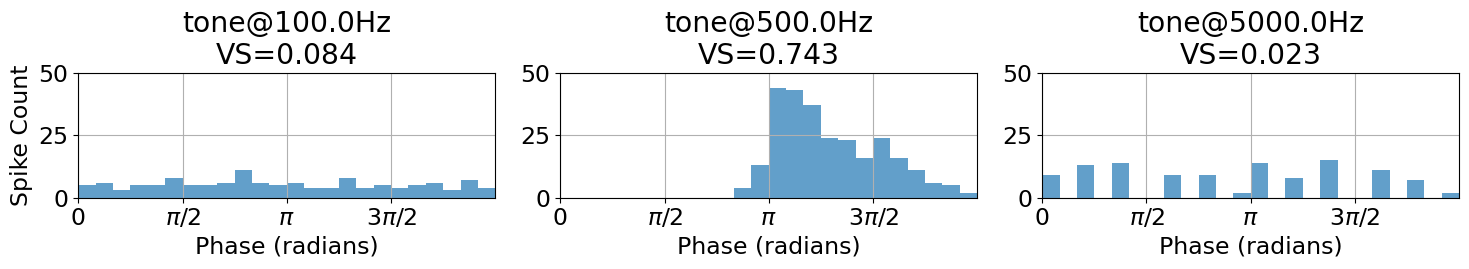

In [27]:
# compare_cochlea_models(spikes_real, spikes_tc, frequency=sound.frequency/b2.Hz)
from models.InhModel.params import Parameters as InhParam
plt.close()
COCH_GAMMATONE = "gammatone"
COCH_TANCARNEY = "TanCarney"
COCH_DCGC = "DCGC"
COCH_PPG = "ppg"
font = {'size'   : 17}
import matplotlib
matplotlib.rc('font', **font)
tones = [Tone(i, 3000 * b2.ms) for i in [100, 500, 5000] * b2.Hz]
for tone in tones:
    tone.sound.level = 70 * b2h.dB
for cochlea_key in [COCH_TANCARNEY]:
# for cochlea_key in [COCH_GAMMATONE, COCH_TANCARNEY, COCH_PPG]:
    fig = show_effect_diff_freq(
        cochlea_key, tones, InhParam().cochlea, ihc_freq=500 * b2.Hz
    )
    fig.show()

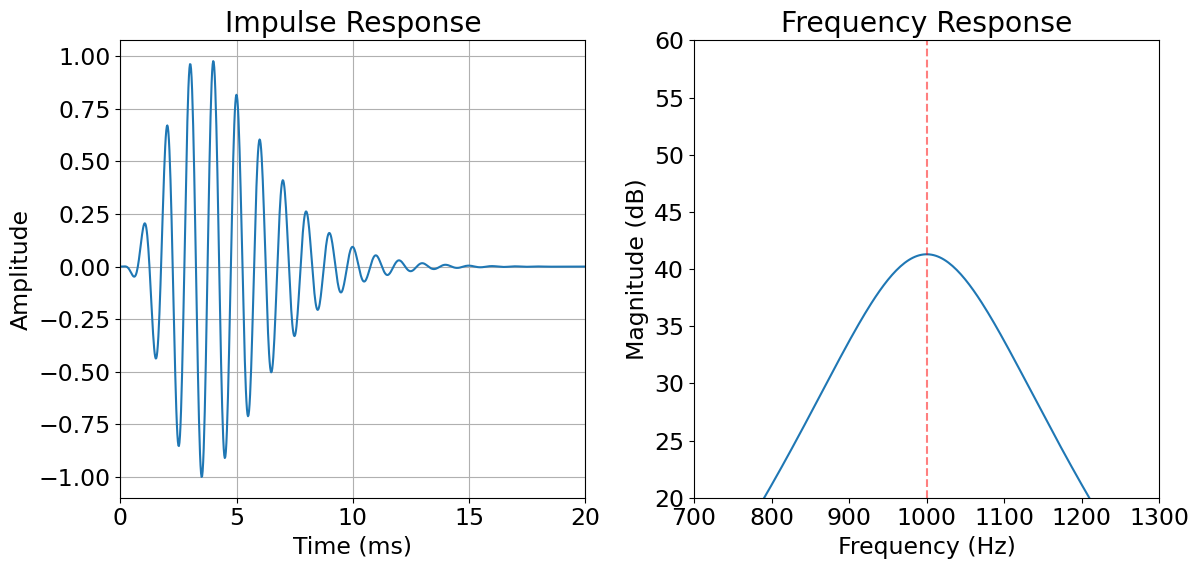

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def gammatone_impulse_response(t, fc, n=4, b=1.019):
    """
    Generate the impulse response of a gammatone filter.
    
    Parameters:
    t : array-like
        Time vector
    fc : float
        Center frequency in Hz
    n : int
        Filter order (typically 4)
    b : float
        Bandwidth parameter (typically 1.019 ERB units)
    """
    erb = 24.7 * (4.37 * fc / 1000 + 1)  # ERB scale
    a = b * 2 * np.pi * erb  # bandwidth in radians/s
    return t**(n-1) * np.exp(-a * t) * np.cos(2 * np.pi * fc * t)

# Generate time vector
duration = 0.1  # 100ms for better frequency resolution
fs = 44100  # sampling frequency
t = np.linspace(0, duration, int(duration * fs))

# Parameters
fc = 1000  # center frequency in Hz
n = 4      # filter order

# Calculate impulse response
h = gammatone_impulse_response(t, fc, )

# Normalize impulse response
h = h / np.max(np.abs(h))

# Calculate frequency response
# Use scipy.signal.freqz for better frequency response calculation
w, H = signal.freqz(h, worN=8192)
freqs = w * fs / (2 * np.pi)  # Convert to Hz

# Create plots
plt.figure(figsize=(12, 6))

# Time domain plot
plt.subplot(121)
plt.plot(t * 1000, h)
plt.title('Impulse Response')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.xlim(0,20)
plt.grid(True)

# Frequency domain plot
plt.subplot(122)
# plt.semilogx(freqs, 20 * np.log10(np.abs(H)))
plt.plot(freqs,20 * np.log10(np.abs(H)))
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(False)
plt.xlim(700, 1300)
plt.ylim(20, 60)

# # Add vertical line at center frequency
plt.axvline(fc, color='r', linestyle='--', alpha=0.5, label=f'fc={fc} Hz')
# plt.legend()

plt.tight_layout()
plt.show()

In [10]:
cf = np.round(np.logspace(np.log(20), np.log(20000), num=3500, base=np.exp(1)), 2)

take_closest(cf, 500)

(499.54, 1630)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Union, List
from dataclasses import dataclass
import seaborn as sns


def visualize_spike_synchrony(
    spike_times_dict: Dict[int, np.ndarray],
    time_window: tuple = (0, 0.10),
    bin_size: float = 0.001,
    max_units: int = 50,
    label = "",
) -> tuple:
    """
    Visualize spike synchrony across units with raster plot, PSTH, and correlation matrix

    Args:
        spike_times_dict: Dictionary of unit_id -> spike times (in seconds)
        time_window: (start_time, end_time) in seconds to analyze
        bin_size: Size of time bins in seconds for PSTH
        max_units: Maximum number of units to plot (for clarity)

    Returns:
        fig: matplotlib figure
        psi: calculated PSI value
    """
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 10))
    gs = plt.GridSpec(2, 2)

    # Select subset of units if too many
    unit_ids = list(spike_times_dict.keys())[:max_units]

    # 1. Raster plot
    ax_raster = fig.add_subplot(gs[0, 0])
    for i, unit_id in enumerate(unit_ids):
        times = spike_times_dict[unit_id] / b2.second
        mask = (times >= time_window[0]) & (times <= time_window[1])
        ax_raster.plot(times[mask], [i] * sum(mask), "|", color="black", markersize=5)
    ax_raster.set_ylabel("Unit ID")
    ax_raster.set_xlabel("Time (s)")
    ax_raster.set_title("Spike Raster")

    # 2. PSTH
    ax_psth = fig.add_subplot(gs[1, 0])
    bins = np.arange(time_window[0], time_window[1] + bin_size, bin_size)
    all_spikes = []
    cf = erbspace(20 * b2.Hz, 20000 * b2.Hz, 3500)
    closest_freq, closest = take_closest(cf, 600*b2.Hz)
    all_spikes = spike_times_dict[closest] / b2.second
    # for unit_id in unit_ids:
    #     times = spike_times_dict[unit_id] / b2.second
    #     mask = (times >= time_window[0]) & (times <= time_window[1])
    #     all_spikes.extend(times[mask])

    ax_psth.hist(all_spikes, bins=bins, color="black")
    ax_psth.set_xlabel("Time (s)")
    ax_psth.set_ylabel("Spike Count")
    ax_psth.set_title(f"Population PSTH for {label}")

    # 3. Correlation Matrix
    # ax_corr = fig.add_subplot(gs[:, 1])

    # Calculate spike trains in bins
    spike_trains = []
    for unit_id in unit_ids:
        times = spike_times_dict[unit_id] / b2.second
        mask = (times >= time_window[0]) & (times <= time_window[1])
        unit_times = times[mask]
        hist, _ = np.histogram(unit_times, bins=bins)
        spike_trains.append(hist)

    spike_trains = np.array(spike_trains)

    # Calculate correlation matrix
    n_units = len(spike_trains)
    correlations = np.zeros((n_units, n_units))

    for i in range(n_units):
        for j in range(n_units):
            corr = np.corrcoef(spike_trains[i], spike_trains[j])[0, 1]
            correlations[i, j] = corr

    # Plot correlation matrix
    # sns.heatmap(
    #     correlations,
    #     ax=ax_corr,
    #     cmap="RdBu_r",
    #     center=0,
    #     vmin=-1,
    #     vmax=1,
    #     cbar_kws={"label": "Correlation"},
    # )
    # ax_corr.set_title("Unit Correlation Matrix")

    # Calculate PSI (mean of upper triangle)
    psi = np.mean(correlations[np.triu_indices(n_units, k=1)])

    plt.suptitle(f"Population Synchrony Analysis (PSI = {psi:.3f})")
    plt.tight_layout()

    return fig, psi


def compare_cochlea_synchrony_with_plots(
    anf_responses: List[AnfResponse], labels: List[str], time_window: tuple = (0, 0.10)
):
    """
    Compare PSI across different cochlea implementations with visualizations

    Args:
        anf_responses: List of AnfResponse objects from different cochlea models
        labels: Names of cochlea implementations
        time_window: Time window for analysis
    """
    results = []

    # Create figure for PSI comparison
    fig_compare = plt.figure(figsize=(10, 5))
    ax_compare = fig_compare.add_subplot(111)

    for response, label in zip(anf_responses, labels):
        # Calculate and visualize PSI for left and right separately
        psi_values = {"L": None, "R": None}

        for ear in ["L", "R"]:
            # Create detailed synchrony plot
            fig_detail, psi = visualize_spike_synchrony(
                response.binaural_anf_spiketrain[ear], time_window=time_window, label =label
            )
            fig_detail.suptitle(f"{label} - {ear} ear (PSI = {psi:.3f})")
            psi_values[ear] = psi

        results.append(
            {
                "label": label,
                "left_psi": psi_values["L"],
                "right_psi": psi_values["R"],
                "mean_psi": np.mean([psi_values["L"], psi_values["R"]]),
            }
        )

    # Plot comparison
    labels = [r["label"] for r in results]
    mean_psi = [r["mean_psi"] for r in results]
    left_psi = [r["left_psi"] for r in results]
    right_psi = [r["right_psi"] for r in results]

    x = np.arange(len(labels))
    width = 0.25

    ax_compare.bar(x - width, left_psi, width, label="Left")
    ax_compare.bar(x, mean_psi, width, label="Mean")
    ax_compare.bar(x + width, right_psi, width, label="Right")

    ax_compare.set_ylabel("PSI")
    ax_compare.set_title("PSI Comparison Across Cochlea Models")
    ax_compare.set_xticks(x)
    ax_compare.set_xticklabels(labels)
    ax_compare.legend()

    plt.tight_layout()

    return results


# Example usage:
"""
# For a single cochlea implementation:
fig, psi = visualize_spike_synchrony(anf_response.binaural_anf_spiketrain['L'])

# For comparing multiple implementations:
results = compare_cochlea_synchrony_with_plots(
    anf_responses=[anf_response1, anf_response2, anf_response3],
    labels=['ERB', 'TanCarney', 'PulsePacket']
)
"""

"\n# For a single cochlea implementation:\nfig, psi = visualize_spike_synchrony(anf_response.binaural_anf_spiketrain['L'])\n\n# For comparing multiple implementations:\nresults = compare_cochlea_synchrony_with_plots(\n    anf_responses=[anf_response1, anf_response2, anf_response3],\n    labels=['ERB', 'TanCarney', 'PulsePacket']\n)\n"

2024-11-17 11:25:37,051 [INFO ]  generating ANF for {'sound': <utils.custom_sounds.ToneBurst object at 0x7f92c38743e0>, 'angle': -90, 'cochlea_key': 'TanCarney', 'params': {'subj_number': 7, 'cochlea_params': None, 'rng_seed': 42, 'omni_noise_level': 0}}


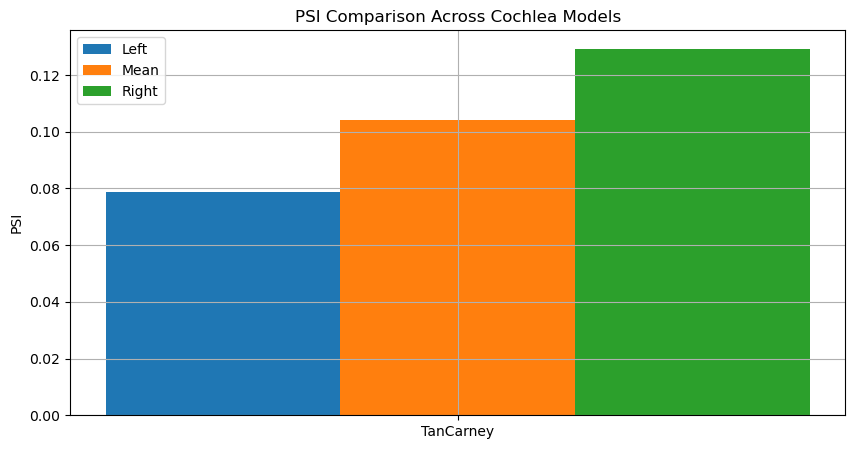

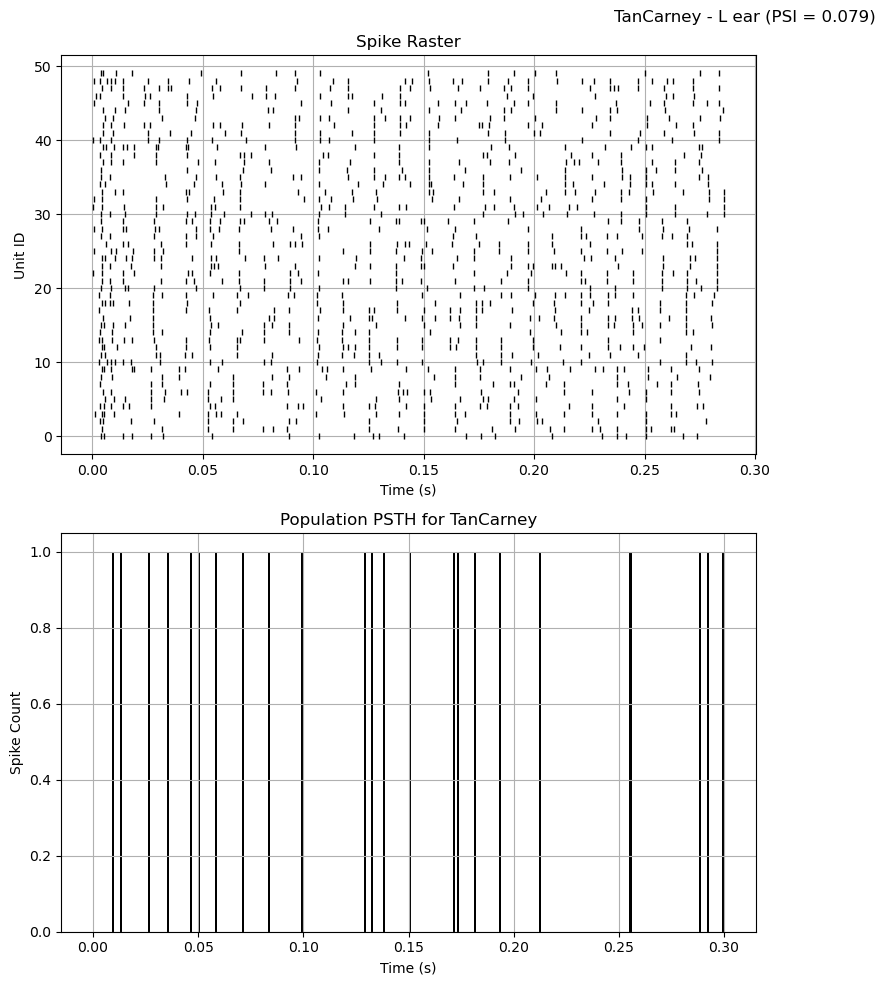

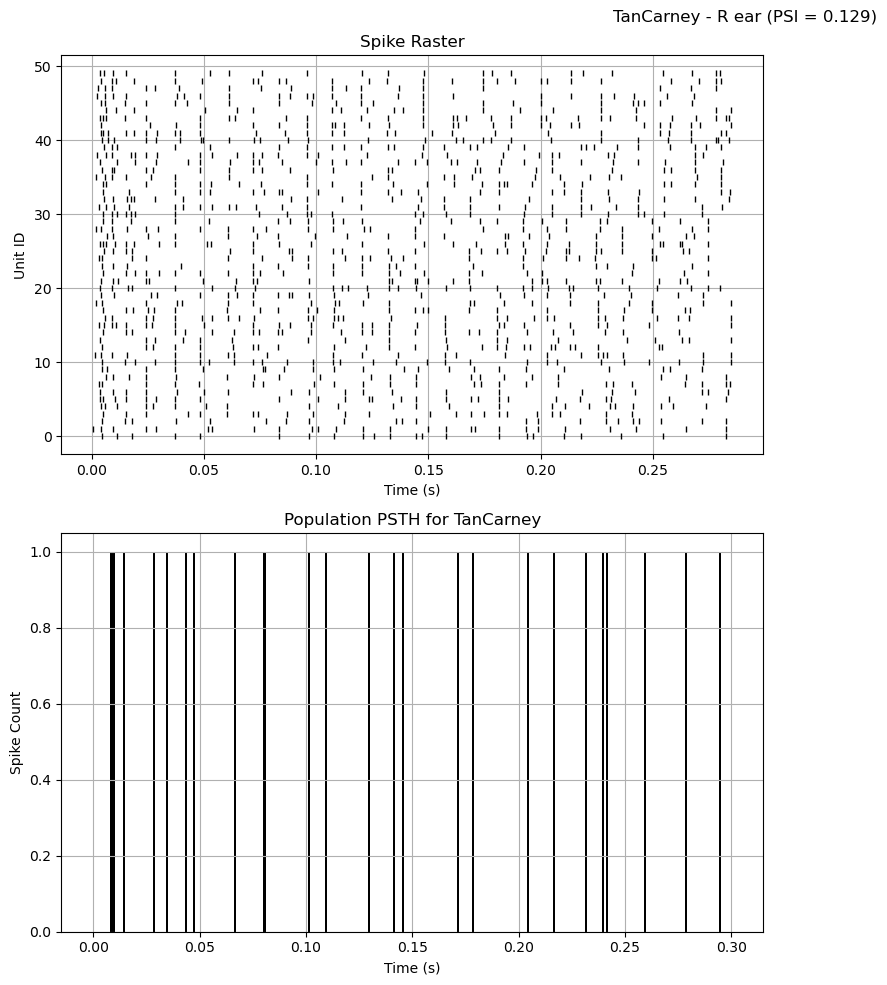

In [13]:
from utils.custom_sounds import ToneBurst

COCH_TANCARNEY = "TanCarney"
sound = ToneBurst(frequency=600 * b2.Hz,burst_num=100)
sound.sound.level = 90 * b2h.dB

spikes_burst = load_anf_response(sound, -90, COCH_TANCARNEY, TcParam().cochlea)
results = compare_cochlea_synchrony_with_plots(
    anf_responses=[spikes_burst],
    time_window=(0, 0.3),
    labels=["TanCarney"],
    # anf_responses=[spikes_real, spikes_tc, spikes_ppg], time_window=(0,0.3), labels=["Gammatone", "TanCarney", "Pulse Packets"]
)

90.0*dB